processing...
processing...
processing...
DONE

Original


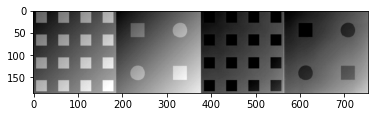

Binarized - fixed


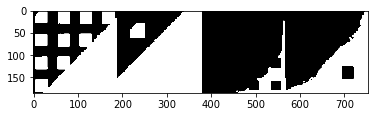

Binarized - otsu


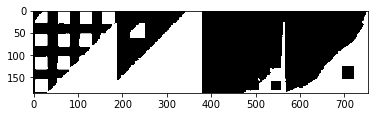

In [2]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def get_sub_array(array, indexes):
    sub_array = []

    for index in indexes:
        sub_array.append(array[indexes])

    return sub_array

def calculate_mean(values):
    return np.mean(values)

def divide_image(image, threshold):
    image_as_array = image.ravel()
    lower_values = []
    upper_values = []

    for value in image_as_array:
        if (value < threshold):
            lower_values.append(value)
        else:
            upper_values.append(value)

    return lower_values,upper_values

def find_threshold(image, threshold = 128, delta = 1.0):
    lower_values,upper_values = divide_image(image, threshold)

    lower_mean = calculate_mean(lower_values)

    upper_mean = calculate_mean(upper_values)

    new_threshold = calculate_mean([lower_mean, upper_mean])

    if abs(new_threshold - threshold) < delta:
        print("DONE\n")
        return new_threshold
    else:
        print("processing...")
        return find_threshold(image, new_threshold, delta)

original_image = cv.imread("shading.png",cv.IMREAD_GRAYSCALE)
mean = calculate_mean(original_image.ravel())
manual_threshold = find_threshold(original_image, mean)
fixed_binarized_image = cv.threshold(original_image, manual_threshold, 255, cv.THRESH_BINARY)[1]
otsu_binarized_image = cv.threshold(original_image, manual_threshold, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]

print("Original")
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.show()

print("Binarized - fixed")
plt.imshow(fixed_binarized_image, cmap='gray', vmin=0, vmax=1)
plt.show()

print("Binarized - otsu")
plt.imshow(otsu_binarized_image, cmap='gray', vmin=0, vmax=1)
plt.show()